<a href="https://colab.research.google.com/github/rcsbiotech/python-gbmeeting-2021/blob/main/05_02_An%C3%A1lise_explorat%C3%B3ria_e_estat%C3%ADstica_b%C3%A1sica_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for GBmeeters - dia 05
## Análise exploratória e estatística básica com Python

O objetivo do tema de hoje é percorrer uma análise exploratória de dados, tentando extrair respostas ou explicações de tabelas com alguma relação entre si.

Para esse fim, as linguagens utilizadas mais comum são a Python e a R, que possuem muitas funcionalidades similares que permitem a análise completa em qualquer uma das plataformas.

Assim, o a ordem de execução da aula será:

1. Sobre as bibliotecas utilizadas;
2. Sobre os conjuntos de dados que vamos explorar;
3. O preparo dos dados para a exploração e
4. A geração das respostas propriamente ditas.

## Sobre análise exploratória

J. W. Tukey propõe que "análise exploratória de dados" deve ser uma atitude, um estado de flexibilidade, que assim como a experimentação em bancada, deve er considerada com uma atividade cujas possibilidades são infindáveis, e cuja condução deve ser altamente interativa e iterativa, em que cada etapa é uma árvore de ações possíveis.

## Desafios de hoje

- Verificar se há correlação entre as diferentes matrizes;
- Testar se alguma diferença categória explica as médias de casos.



# Importando as bibliotecas

Como já foi mostrado nos pedaços anteriores do curso, primeiro vamos importar alguns conjuntos de bibliotecas que serão muito úteis para o processamento dos dados.

---
## Sobre as bibliotecas

Nas seções abaixo, comentamos brevemente sobre as bibliotecas que utilizaremos na análise exploratória, que são canônicas para muitissimos usos de Python nas ciências.

![img00Packages](https://i.imgur.com/BgDDu6n.png)

---
### NumPy

A Numpy é a biblioteca padrão para operações em um tipo de dados parecido com vetor, os arranjos. A partir desses arranjos, ela contém operações matemáticas rebuscadas, como operações trigonométricas, algébricas e estatísticas.

Um bom guia para entender o NumPy é: https://numpy.org/devdocs/user/absolute_beginners.html

---

### Pandas

Como já dado na aula do Renato Santos, o Pandas, por sua vez, é uma biblioteca muito popular para manipulação e análises de dados. Como mostraremos, esse pacote é muito interessante para transformar tabelas, dando formas interessantes e viáveis de análise.

---

### Matplotlib

Esta é a principal biblioteca de referência para gerar gráficos com a Python, similar ao pacote "ggplot2" da linguagem R. O site para referência é: https://matplotlib.org/. 

O uso mais interessante dele é produzir os mais diversos tipos de figuras, que permitem revirar dados de formas interessantes.

---

### SciPy

Assim como o NumPy, o SciPy também é uma biblioteca avançada, mas que contém funções complexas aplicáveis às ciências, engenharia e matemática. Na verdade, o Pandas, Matplotlib e o NumPy pertencem ao ecossistema da SciPy.

---

In [485]:
## Pacotes clássicos
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib as mp
import matplotlib.pyplot as plt

## Pacotes de estatística
import statsmodels.stats.multicomp as stats

## Vamos usar também um pacote específico para o colab, que permite manipular figuras
from google.colab import drive
drive.mount('/content/gdrive')
images_dir = '/content/gdrive/My Drive/Images'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Os conjuntos de dados: "COVID", "CAGED", "PRICE" e "BRAZIL"

Talvez a etapa mais importante para inferir alguma coisa de conjuntos de dados é entender o que os dados são, e se possivelmente existe relação entre eles.

A seguir, descrevemos brevemente os dados utilizados, sua estrutura, e as informações que contém.

Os dados podem ser baixados [neste link](https://drive.google.com/file/d/1shA13aulqT10rVJgVJs-Ccn15kDHOOfS/view?usp=drivesdk).

Faça o upload deles no Colab, e os insira na pasta "CovidDS".

## Dataset: COVID

É o conjunto de dados oficial disponibilizado pelo Ministério da Saúde até 13 de Janeiro de 2021, que contém o número de novos casos ativos e recuperados por região e estado.

## Dataset: CAGED

Este conjunto de dados foi retirado do IPEA (Instituto de Pesquisa Econômica Aplicada) e registra o número de pessoas que foram desempregadas no período de janeiro de 2020 até outubro de 2020. Potencialmente existe uma correlação por estado entre o número de casos de COVID e o número de pessoas que foram demitidas. 

Ou quanto mais casos mais pessoas foram empregadas?

## Dataset: PRICE

Também um dado retirado do IPEA, que reflete o preço das cestas básicas nas capitais do Brasil. Não sabemos se há, mas é possível que os preços dos alimentos estejam correlacionados ou sejam explicados ou pelos números de casos de COVID, ou pelo número de novos desempregados. 

## Dataset: BRAZIL

São um conjunto de variáveis qualitativas (sem números) e quantitativas (numéricas), com diversas características arbitrárias sobre o Brasil, que possivelmente explicariam aumentos e decréscimos nos casos de COVID.

Alguns exemplos:
- Se o estado é litorâneo ou não;
- O número de estradas por estado;
- O número de aeroportos por estado.


In [486]:
## Lendo os dados
df_covid = pd.read_csv("./CovidDS/brazil_covid19.csv")
df_caged = pd.read_csv("./CovidDS/caged-ipeadata11-01-2021-09-05.xls")
df_price = pd.read_csv("./CovidDS/fixed-dieese-ipeadata(11-01-2021-10-03).xls")
df_brdat = pd.read_csv("./CovidDS/brasil.csv", sep=";")

## Pedaço "cabeça" da tabela COVID
df_covid.head()

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0


In [487]:
# Pedaço da tabela "CAGED" de desempregados
df_caged.head()

,Sigla,Código,Estado,D2020.01,D2020.02,D2020.03,D2020.04,D2020.05,D2020.06,D2020.07,D2020.08,D2020.09,D2020.10
0,AC,12,Acre,2179,1802,2238,1805,1405,1423,1521,1664,1632,1725
1,AL,27,Alagoas,12236,16654,12578,9855,7371,4697,5483,5710,5952,5939
2,AM,13,Amazonas,11943,10607,13602,14292,10346,8126,9223,8599,9751,10344
3,AP,16,Amapá,1831,1562,1613,1341,1007,998,1601,1363,1245,1235
4,BA,29,Bahia,45832,41478,57354,55652,41697,32099,31638,34344,33773,37962


In [488]:
# Pedaço da tabela "PRICE" do preço dos alimentos
df_price.head(5)

,Sigla,Município,P2020.01,P2020.02,P2020.03,P2020.04,P2020.05,P2020.06,P2020.07,P2020.08,P2020.09,P2020.10
0,AC,Rio Branco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,Maceió,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AM,Manaus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AP,Macapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BA,Salvador,376.49,395.49,408.06,425.12,410.33,419.18,415.22,418.72,459.33,454.5


In [489]:
# E também da tabela Brasil
df_brdat.head(10)

,Estados,Capitais,Sigla,Regiao,Litoraneo,FronteiraSeca,AreaKM2,Populacao2020,DensidadeDemografica2010,MatriculaFundamental2018,IDH2010,ReceitaEstadual2017,DespesaEstadual2017,RendaDomicilar2019,Veiculos2018
0,Acre,Rio Branco,AC,NO,LitoraneoNao,FronteiraSim,164123.964,894470,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
1,Alagoas,Maceió,AL,NE,LitoraneoSim,FronteiraNao,27843.295,3351543,112.33,490587,0.631,1.195044e+07,1.046063e+07,731,834827
2,Amapá,Macapá,AP,NO,LitoraneoSim,FronteiraSim,142470.762,861773,4.69,136185,0.708,5.396417e+06,4.224464e+06,880,195039
3,Amazonas,Manaus,AM,NO,LitoraneoNao,FronteiraSim,1559167.889,4207714,2.23,705007,0.674,1.732846e+07,1.532490e+07,842,883083
4,Bahia,Salvador,BA,NE,LitoraneoSim,FronteiraNao,564760.427,14930634,24.82,2034711,0.660,5.019100e+07,4.557016e+07,913,4139107
5,Ceará,Fortaleza,CE,NE,LitoraneoSim,FronteiraNao,148894.441,9187103,56.76,1198116,0.682,2.842022e+07,2.460835e+07,942,3148369
6,Distrito Federal*,Brasília,DF,CO,LitoraneoNao,FronteiraNao,5760.783,3055149,444.66,377622,0.824,2.381221e+07,2.199046e+07,2686,1812473
7,Espírito Santo,Vitória,ES,SE,LitoraneoSim,FronteiraNao,46074.447,4064052,76.25,502059,0.740,1.968562e+07,1.439234e+07,1477,1936862
8,Goiás,Goiânia,GO,CO,LitoraneoNao,FronteiraNao,340203.329,7113540,17.65,877593,0.735,3.788534e+07,2.424838e+07,1306,3909429
9,Maranhão,São Luís,MA,NE,LitoraneoSim,FronteiraNao,329642.182,7114598,19.81,1178949,0.639,1.850326e+07,1.762717e+07,636,1696683


Além da ponta inicial, é possível dar uma olhada na ponta final (ou cauda, "tail") das tabelas:

In [490]:
df_covid.tail()

,date,region,state,cases,deaths
8743,2021-01-13,Sudeste,RJ,469437,27241
8744,2021-01-13,Sudeste,SP,1577119,48985
8745,2021-01-13,Sul,PR,486843,8916
8746,2021-01-13,Sul,RS,490980,9699
8747,2021-01-13,Sul,SC,529389,5765


Um lembrete sobre o uso de funções:

![img01fn](https://i.imgur.com/tvym810.png)

## Procedimento (laço "for"): extraindo todos os meses da tabela

Queremos analisar os dados mês a mês. Entretanto, observamos do conjunto COVID que os dados estão organizados a cada dia. 

Assim, é necessário extrair a informação "mês" de cada uma das leituras.


In [491]:
## Observe como são dias
df_covid.tail(15)

,date,region,state,cases,deaths
8733,2021-01-13,Nordeste,SE,124942,2607
8734,2021-01-13,Norte,AC,43785,829
8735,2021-01-13,Norte,AM,219544,5879
8736,2021-01-13,Norte,AP,72049,987
8737,2021-01-13,Norte,PA,305012,7349
8738,2021-01-13,Norte,RO,104737,1965
8739,2021-01-13,Norte,RR,70086,800
8740,2021-01-13,Norte,TO,94381,1286
8741,2021-01-13,Sudeste,ES,269088,5416
8742,2021-01-13,Sudeste,MG,611152,12894


Assim, o procedimento se resume em:

1. Para cada campo "Data"
2. Extraia a informação mês
3. Guarde em um outro objeto.

In [492]:
## Formatar a tabela por mês
meses_lista = []

## Separa as datas
print(df_covid['date'].str.split('-'))

0       [2020, 02, 25]
1       [2020, 02, 25]
2       [2020, 02, 25]
3       [2020, 02, 25]
4       [2020, 02, 25]
             ...      
8743    [2021, 01, 13]
8744    [2021, 01, 13]
8745    [2021, 01, 13]
8746    [2021, 01, 13]
8747    [2021, 01, 13]
Name: date, Length: 8748, dtype: object


In [493]:
## Assim, separa mês a mês:
for mês in df_covid['date'].str.split('-'):
    ## Lembre-se que a Python começa a contar do 00!
    ## 0 - Ano
    ## 1 - Mês
    ## 2 - Dia
    # month[1] acessa o mês de cada elemento
    # int() converte para inteiro
    # append() cria um "apêndice", isto é, adiciona algo ao final de uma lista
    meses_lista.append(int(mês[1]))

## E então, veja o objeto gerado
meses_lista[1:5]

[2, 2, 2, 2]

![img02fnFor](https://i.imgur.com/XZTKWz7.png)

In [494]:
## Então, gravamos os meses de volta na tabela:
df_covid['Month'] = meses_lista
df_covid.tail(15)

,date,region,state,cases,deaths,Month
8733,2021-01-13,Nordeste,SE,124942,2607,1
8734,2021-01-13,Norte,AC,43785,829,1
8735,2021-01-13,Norte,AM,219544,5879,1
8736,2021-01-13,Norte,AP,72049,987,1
8737,2021-01-13,Norte,PA,305012,7349,1
8738,2021-01-13,Norte,RO,104737,1965,1
8739,2021-01-13,Norte,RR,70086,800,1
8740,2021-01-13,Norte,TO,94381,1286,1
8741,2021-01-13,Sudeste,ES,269088,5416,1
8742,2021-01-13,Sudeste,MG,611152,12894,1


## Obtendo casos por mês.

Agora temos uma modificação no nosso objeto original `df_covid`: ele consta com os meses de cada relato.

Entretanto, precisamos contar quantos foram os casos novos a cada mês. Entretanto, nós só temos o relato de quantos casos novos foram gerados a cada dia.

Para isso, vamos usar da nossa inteligência para extrair a informação, a partir da seguinte inferência:

- O último relato do mês deve conter o número final de casos de um certo mês.
- Se eu subtrair o número final do mês anterior, devo obter somente os deste mês.

---
$$
\text{soma acumulada do mês anterior}-\text{soma acumulada deste mês} = \text{casos este mês}
$$

Assim, vamos operar para extrair essa informação, para cada estado.

## Laço "for" por mês, e por estado.

Assim, vamos operacionar um próximo laço "for" com 2 estágios.

1. O primeiro deles vai picar a tabela para cada estado;
2. O segundo deles vai picar dentro de cada estado, cada mês.

In [495]:
# Primeiro, vamos sumarizar nossa lista de meses, que originalmente tem essa cara:
## Note que extraímos um mês para cada relato do MS
meses_lista[1:15]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [496]:
# Entretanto, desejamos somente a ordem dos meses, que pode ser extraído
## da seguinte forma:
meses_limpo = pd.Series(meses_lista).drop_duplicates()
meses_limpo

0        2
135      3
972      4
1782     5
2619     6
3429     7
4266     8
5103     9
5913    10
6750    11
7560    12
8397     1
dtype: int64

![img03pdSeries](https://i.imgur.com/QqM0nuU.png)

In [497]:
## Vamos inicializar um objeto para salvar os casos:
todos_casos = []
casos_por_estado_mes = []

## Vamos gerar, também, uma lista com os estados
estados_unicos = df_covid['state'].unique()
estados_unicos

array(['DF', 'GO', 'MS', 'MT', 'AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI',
       'RN', 'SE', 'AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO', 'ES', 'MG',
       'RJ', 'SP', 'PR', 'RS', 'SC'], dtype=object)

In [498]:
## Por fim, capturamos, para cada estado, para cada mês, os casos.
### Para cada estado, vamos extrair a soma de casos por mês.
for estado_loop in estados_unicos:
  
    ## Separa uma tabela por estado
    df = df_covid[df_covid['state'] == estado_loop]
    
    ## Para cada mês único, extraia o número de casos ao final do mês
    ### Começa com 0 casos
    casos_real = 0
    casos_acumulados = 0
    
    ## Para salvar casos, estado, e mês
    casos_por_estado_mes = []
    
    ## Contador do loop
    #counter = 0
    
    for mês in meses_limpo:
        ## Separa o mês específico
        df_sum = df[df['Month'] == mês]
        
        ## Salva o número de casos do mês
        casos_laço = int(df_sum[-1:]['cases'])
              
        ## Calcula os casos acumulados
        casos_real = casos_laço - casos_acumulados
        
        ## Registra os casos acumulados
        casos_acumulados = casos_acumulados + casos_real
        
        ## Salva os casos, por estado, por mês
        casos_por_estado_mes.append([estado_loop, mês, casos_real])
        
    ## Salva os casos
    todos_casos.append(casos_por_estado_mes)    

In [499]:
## Então veja os casos:
NovosCasosDF = pd.DataFrame(todos_casos)
NovosCasosDF

,0,1,2,3,4,5,6,7,8,9,10,11
0,"[DF, 2, 0]","[DF, 3, 332]","[DF, 4, 1024]","[DF, 5, 8424]","[DF, 6, 39438]","[DF, 7, 57074]","[DF, 8, 55750]","[DF, 9, 30203]","[DF, 10, 21000]","[DF, 11, 15901]","[DF, 12, 22555]","[DF, 1, 9755]"
1,"[GO, 2, 0]","[GO, 3, 65]","[GO, 4, 716]","[GO, 5, 2921]","[GO, 6, 20679]","[GO, 7, 43560]","[GO, 8, 64565]","[GO, 9, 76905]","[GO, 10, 46036]","[GO, 11, 23966]","[GO, 12, 29455]","[GO, 1, 14151]"
2,"[MS, 2, 0]","[MS, 3, 48]","[MS, 4, 207]","[MS, 5, 1234]","[MS, 6, 6476]","[MS, 7, 16971]","[MS, 8, 24001]","[MS, 9, 20769]","[MS, 10, 12638]","[MS, 11, 16717]","[MS, 12, 34700]","[MS, 1, 12382]"
3,"[MT, 2, 0]","[MT, 3, 25]","[MT, 4, 272]","[MT, 5, 2132]","[MT, 6, 13207]","[MT, 7, 36229]","[MT, 8, 39481]","[MT, 9, 32070]","[MT, 10, 19486]","[MT, 11, 15231]","[MT, 12, 21294]","[MT, 1, 13627]"
4,"[AL, 2, 0]","[AL, 3, 18]","[AL, 4, 1026]","[AL, 5, 9244]","[AL, 6, 25674]","[AL, 7, 23763]","[AL, 8, 19079]","[AL, 9, 8075]","[AL, 10, 3910]","[AL, 11, 4195]","[AL, 12, 9834]","[AL, 1, 4902]"
5,"[BA, 2, 0]","[BA, 3, 213]","[BA, 4, 2638]","[BA, 5, 15541]","[BA, 6, 54915]","[BA, 7, 92847]","[BA, 8, 90573]","[BA, 9, 53799]","[BA, 10, 42631]","[BA, 11, 49914]","[BA, 12, 90329]","[BA, 1, 25555]"
6,"[CE, 2, 0]","[CE, 3, 390]","[CE, 4, 7216]","[CE, 5, 40883]","[CE, 6, 60210]","[CE, 7, 65183]","[CE, 8, 41071]","[CE, 9, 26206]","[CE, 10, 33026]","[CE, 11, 26442]","[CE, 12, 34464]","[CE, 1, 13323]"
7,"[MA, 2, 0]","[MA, 3, 31]","[MA, 4, 3159]","[MA, 5, 31449]","[MA, 6, 45812]","[MA, 7, 40210]","[MA, 8, 30954]","[MA, 9, 21949]","[MA, 10, 12263]","[MA, 11, 7343]","[MA, 12, 7768]","[MA, 1, 1636]"
8,"[PB, 2, 0]","[PB, 3, 17]","[PB, 4, 797]","[PB, 5, 12348]","[PB, 6, 33795]","[PB, 7, 35837]","[PB, 8, 22984]","[PB, 9, 15489]","[PB, 10, 11882]","[PB, 11, 12104]","[PB, 12, 21231]","[PB, 1, 7715]"
9,"[PE, 2, 0]","[PE, 3, 87]","[PE, 4, 6789]","[PE, 5, 27574]","[PE, 6, 24408]","[PE, 7, 36147]","[PE, 8, 30534]","[PE, 9, 21632]","[PE, 10, 15722]","[PE, 11, 19513]","[PE, 12, 39760]","[PE, 1, 13875]"


In [500]:
## A seguida, adicionamos estados como coluna
NovosCasosDF.insert(0, "Sigla", estados_unicos, True)
NovosCasosDF.head()

,Sigla,0,1,2,3,4,5,6,7,8,9,10,11
0,DF,"[DF, 2, 0]","[DF, 3, 332]","[DF, 4, 1024]","[DF, 5, 8424]","[DF, 6, 39438]","[DF, 7, 57074]","[DF, 8, 55750]","[DF, 9, 30203]","[DF, 10, 21000]","[DF, 11, 15901]","[DF, 12, 22555]","[DF, 1, 9755]"
1,GO,"[GO, 2, 0]","[GO, 3, 65]","[GO, 4, 716]","[GO, 5, 2921]","[GO, 6, 20679]","[GO, 7, 43560]","[GO, 8, 64565]","[GO, 9, 76905]","[GO, 10, 46036]","[GO, 11, 23966]","[GO, 12, 29455]","[GO, 1, 14151]"
2,MS,"[MS, 2, 0]","[MS, 3, 48]","[MS, 4, 207]","[MS, 5, 1234]","[MS, 6, 6476]","[MS, 7, 16971]","[MS, 8, 24001]","[MS, 9, 20769]","[MS, 10, 12638]","[MS, 11, 16717]","[MS, 12, 34700]","[MS, 1, 12382]"
3,MT,"[MT, 2, 0]","[MT, 3, 25]","[MT, 4, 272]","[MT, 5, 2132]","[MT, 6, 13207]","[MT, 7, 36229]","[MT, 8, 39481]","[MT, 9, 32070]","[MT, 10, 19486]","[MT, 11, 15231]","[MT, 12, 21294]","[MT, 1, 13627]"
4,AL,"[AL, 2, 0]","[AL, 3, 18]","[AL, 4, 1026]","[AL, 5, 9244]","[AL, 6, 25674]","[AL, 7, 23763]","[AL, 8, 19079]","[AL, 9, 8075]","[AL, 10, 3910]","[AL, 11, 4195]","[AL, 12, 9834]","[AL, 1, 4902]"


In [501]:
## Deixa somente os meses
for coluna in NovosCasosDF.columns[1:]:
    
    # Objeto vazio para casos
    lista_de_casos = []
    
    #print(NewCasesDF[column])
    for list in NovosCasosDF[coluna]:
        lista_de_casos.append(list[2])
        
    # Salva os novos casos
    NovosCasosDF[coluna] = lista_de_casos

In [502]:
## Então, veja a saída:
NovosCasosDF.head()

,Sigla,0,1,2,3,4,5,6,7,8,9,10,11
0,DF,0,332,1024,8424,39438,57074,55750,30203,21000,15901,22555,9755
1,GO,0,65,716,2921,20679,43560,64565,76905,46036,23966,29455,14151
2,MS,0,48,207,1234,6476,16971,24001,20769,12638,16717,34700,12382
3,MT,0,25,272,2132,13207,36229,39481,32070,19486,15231,21294,13627
4,AL,0,18,1026,9244,25674,23763,19079,8075,3910,4195,9834,4902


## Em detalhes...
![img04cases](https://i.imgur.com/sdLF4ab.png)

## Renomeando colunas

Para que todas as tabelas tenham o mesmo nome de colunas, e assim sejam todas comparáveis, vamos renomear as colunas da nossa matriz formatada, `NovosCasosDF`.

In [503]:
## Renomeia as colunas, mês a mês
NovosCasosRenomeada = NovosCasosDF.rename(columns = {0 : str("2020.02"),
                                      1 : "2020.03",
                                      2 : "2020.04",
                                      3 : "2020.05",
                                      4 : "2020.06",
                                      5 : "2020.07",
                                      6 : "2020.08",
                                      7 : "2020.09",
                                      8 : "2020.10",
                                      9 : "2020.11",
                                      10 : "2020.12",
                                      11 : "2021.01"})

## Exibe o resultado parcialmente
NovosCasosRenomeada.head(10)

,Sigla,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12,2021.01
0,DF,0,332,1024,8424,39438,57074,55750,30203,21000,15901,22555,9755
1,GO,0,65,716,2921,20679,43560,64565,76905,46036,23966,29455,14151
2,MS,0,48,207,1234,6476,16971,24001,20769,12638,16717,34700,12382
3,MT,0,25,272,2132,13207,36229,39481,32070,19486,15231,21294,13627
4,AL,0,18,1026,9244,25674,23763,19079,8075,3910,4195,9834,4902
5,BA,0,213,2638,15541,54915,92847,90573,53799,42631,49914,90329,25555
6,CE,0,390,7216,40883,60210,65183,41071,26206,33026,26442,34464,13323
7,MA,0,31,3159,31449,45812,40210,30954,21949,12263,7343,7768,1636
8,PB,0,17,797,12348,33795,35837,22984,15489,11882,12104,21231,7715
9,PE,0,87,6789,27574,24408,36147,30534,21632,15722,19513,39760,13875


Assim, vamos dar algumas olhadas, finalmente, em como se parecem os nossos dados.

# Matplotlib: ferramentas gráficas essenciais

Como conversamos, um dos principais pacotes que se utiliza de funcionalidade gráfica é o `matplotlib`, que importamos no começo de nosso código como `mp`.

## Histogramas: contando frequências

Uma das formas gráficas mais simples é a de histogramas, cuja função principal é mostrar quantas vezes uma certa contagem aparece, ou seja, a frequência de uma contagem.

Primeiro, vamos olhar os dados originais para o Estado de São Paulo: qual foi o número de casos mais frequentemente relatado?


In [504]:
## Primeiro, vamos separar somente os casos de SP.
casesSP = df_covid[df_covid['state'] == "SP"]
casesSP.head()

,date,region,state,cases,deaths,Month
23,2020-02-25,Sudeste,SP,0,0,2
50,2020-02-26,Sudeste,SP,1,0,2
77,2020-02-27,Sudeste,SP,1,0,2
104,2020-02-28,Sudeste,SP,1,0,2
131,2020-02-29,Sudeste,SP,2,0,2


In [505]:
# Como são os casos de fato?
## Ponta inicial
casesSP['cases'].head()

23     0
50     1
77     1
104    1
131    2
Name: cases, dtype: int64

In [506]:
## Ponta final
casesSP['cases'].tail()

8636    1540513
8663    1546132
8690    1549142
8717    1561844
8744    1577119
Name: cases, dtype: int64

(array([107.,  24.,  20.,  17.,  17.,  26.,  36.,  35.,  22.,  20.]),
 array([      0. ,  157711.9,  315423.8,  473135.7,  630847.6,  788559.5,
         946271.4, 1103983.3, 1261695.2, 1419407.1, 1577119. ]),
 <a list of 10 Patch objects>)

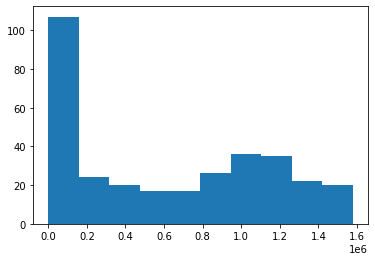

In [507]:
## Então, executamos o histograma
mp.pyplot.hist(x=casesSP['cases'])

Observamos acima que a Python sozinha fez diversos escalonamentos e alterações, que mostra que por muito tempo houveram menos de 200 mil casos, mas que prosseguiu em velocidade aproximadamente constante até 1.0 mi de casos, em que a coisa acelerou.

Notar que a figura é de baixa qualidade, mas pode ser exportada e visualizada em maior detalhe:

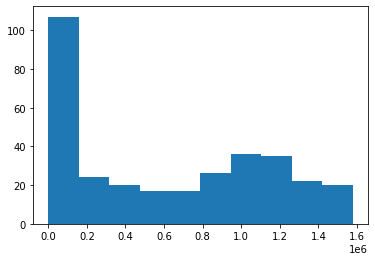

In [508]:
# Chamamos o ambiente de figura
mp.pyplot.figure()

# Plotamos o gráfico em si
mp.pyplot.hist(x=casesSP['cases'])

# Finalmente, solicitamos que seja salvo em SVG, de alta qualidade
mp.pyplot.savefig(f"{images_dir}/abc.svg", format="svg")

Vamos tentar novamente, agora com os dados transformados os quais geramos, cuja informação não é o número de casos acumulados, mas sim o total de casos novos por mês.

In [509]:
## Lembre-se da nova matriz
NovosCasosRenomeada.head()

,Sigla,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12,2021.01
0,DF,0,332,1024,8424,39438,57074,55750,30203,21000,15901,22555,9755
1,GO,0,65,716,2921,20679,43560,64565,76905,46036,23966,29455,14151
2,MS,0,48,207,1234,6476,16971,24001,20769,12638,16717,34700,12382
3,MT,0,25,272,2132,13207,36229,39481,32070,19486,15231,21294,13627
4,AL,0,18,1026,9244,25674,23763,19079,8075,3910,4195,9834,4902


In [510]:
## Vamos separar somente para SP
SP_Casos = NovosCasosRenomeada[NovosCasosRenomeada["Sigla"] == "SP"]
SP_Casos

,Sigla,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12,2021.01
23,SP,2,2337,26359,81000,171682,260924,262038,181286,130499,125526,220644,114822


In [511]:
## Queremos apenas as colunas numéricas
SP_Casos_Num = SP_Casos.iloc[:, 1:13]
SP_Casos_Num

,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12,2021.01
23,2,2337,26359,81000,171682,260924,262038,181286,130499,125526,220644,114822


(array([2., 1., 0., 1., 3., 0., 2., 0., 1., 2.]),
 array([2.000000e+00, 2.620560e+04, 5.240920e+04, 7.861280e+04,
        1.048164e+05, 1.310200e+05, 1.572236e+05, 1.834272e+05,
        2.096308e+05, 2.358344e+05, 2.620380e+05]),
 <a list of 10 Patch objects>)

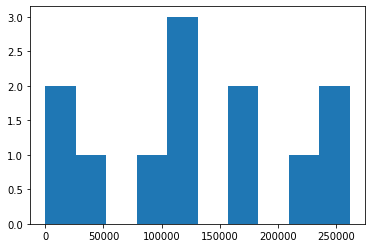

In [512]:
## Então executamos o histograma
plt.hist(SP_Casos_Num)

Percebemos que esse não é um gráfico muito informativo, talvez seja necessário mostrar informações nos dois eixos. Então, testaremos um gráfico de dispersão.

Ao contrário do histograma (que mostra apenas contagem e frequência), o dispersão mostra gráficos nos dois eixos.

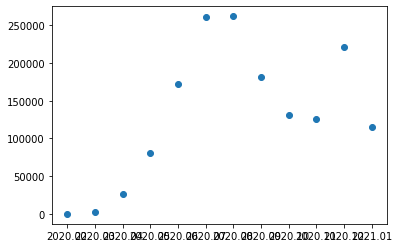

In [513]:
## Gráfico de dispersão
plt.scatter(y=SP_Casos_Num, x=SP_Casos_Num.columns)

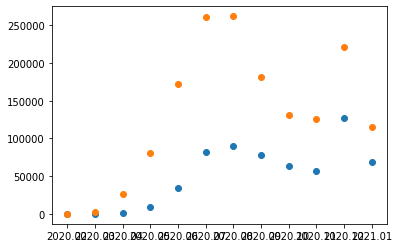

In [514]:
## Vamos tentar combinar vários estados, lembre-se do script para SP:
# SP_Casos = NovosCasosRenomeada[NovosCasosRenomeada["Sigla"] == "SP"]
# SP_Casos_Num = SP_Casos.iloc[:, 1:13]

## Vamos tentar algo mais rápido
Sigla = "MG"
MG_Casos_Num = NovosCasosRenomeada[NovosCasosRenomeada["Sigla"] == Sigla].iloc[:, 1:13]

## E então, exibimos os gráficos:
plt.scatter(y=MG_Casos_Num, x=MG_Casos_Num.columns)
plt.scatter(y=SP_Casos_Num, x=SP_Casos_Num.columns)

Pensando bem, não é exatamente honesto comparar as populações de dois estados com populações diferentes.

As populações são:
- SP: 44 milhões
- MG: 21,1 milhões

Vamos dividir o número de casos por pessoas. Na Python, podemos fazer uma divisão de vetores inteiros.

In [515]:
# Lembre-se dos objetos de cada estado:
## MG_Casos_Num
## SP_Casos_Num

## Vamos normalizar para casos a cada 10000 pessoas:
SP_Casos_Normalizado = (SP_Casos_Num/44000000)*10000
MG_Casos_Normalizado = (MG_Casos_Num/21100000)*10000

## Como se parecem?
SP_Casos_Normalizado


,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12,2021.01
23,0.000455,0.531136,5.990682,18.409091,39.018636,59.300909,59.554091,41.201364,29.658864,28.528636,50.146364,26.095909


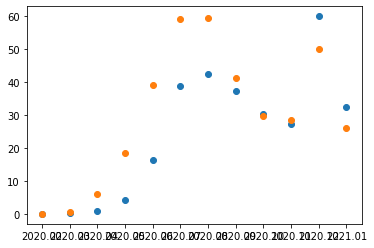

In [516]:
# Então, executamos novamente os gráficos:
## E então, exibimos os gráficos:
plt.scatter(y=MG_Casos_Normalizado, x=MG_Casos_Normalizado.columns)
plt.scatter(y=SP_Casos_Normalizado, x=SP_Casos_Normalizado.columns)

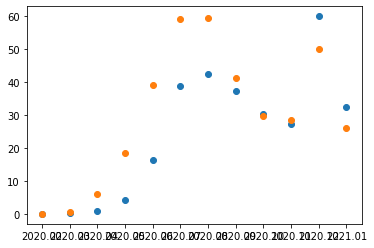

In [517]:
## Salvando sempre fica melhor
# Chamamos o ambiente de figura
mp.pyplot.figure()

# Plotamos o gráfico em si
plt.scatter(y=MG_Casos_Normalizado, x=MG_Casos_Normalizado.columns)
plt.scatter(y=SP_Casos_Normalizado, x=SP_Casos_Normalizado.columns)

# Finalmente, solicitamos que seja salvo em SVG, de alta qualidade
mp.pyplot.savefig(f"{images_dir}/cases_SP_MG.svg", format="svg")

Assim, vamos normalizar todos os estados por sua população e obter um valor comparável para todos eles, e finalmente, podemos executar nossos testes de correlação.

Nesse próximo procedimento, vamos construir o laço for passo a passo, e não inteiro pronto como anteriormente.

# Construindo um laço "for"

In [518]:
## Lembre-se que temos a população no conjunto Brasil:
df_brdat['Populacao2020']

0       894470
1      3351543
2       861773
3      4207714
4     14930634
5      9187103
6      3055149
7      4064052
8      7113540
9      7114598
10     3526220
11     2809394
12    21292666
13     8690745
14     4039277
15    11516840
16     9616621
17     3281480
18    17366189
19     3534165
20    11422973
21     1796460
22      631181
23     7252502
24    46289333
25     2318822
26     1590248
Name: Populacao2020, dtype: int64

Façamos assim um laço for:

1. Para cada estado com casos;
2. Divida o número de casos pela população;
3. Normalize para Casos/100000 pessoas.

In [519]:
## Vejamos os estados
for estado in NovosCasosRenomeada['Sigla']:
  print(estado)

DF
GO
MS
MT
AL
BA
CE
MA
PB
PE
PI
RN
SE
AC
AM
AP
PA
RO
RR
TO
ES
MG
RJ
SP
PR
RS
SC


A seguir, vamos separar uma tabela para cada estado:

In [520]:
## Vamos separar uma tabela para cada estado (subset)
## Vejamos os estados
for estado in NovosCasosRenomeada['Sigla']:
  estado_para_dividir = NovosCasosRenomeada[NovosCasosRenomeada['Sigla'] == estado]

print(estado_para_dividir)

   Sigla  2020.02  2020.03  2020.04  ...  2020.10  2020.11  2020.12  2021.01
26    SC        0      219     1866  ...    43462   105404   128239    36806

[1 rows x 13 columns]


A seguir, vamos colocar a operação da divisão por população, para que seja normalizado, como anteriormente, a nível de casos a cada 100 mil pessoas.

In [521]:
## Agora, adquirimos o número para dividir
for estado in NovosCasosRenomeada['Sigla']:
  estado_para_dividir = NovosCasosRenomeada[NovosCasosRenomeada['Sigla'] == estado]
  pop_do_estado = df_brdat['Populacao2020'][df_brdat['Sigla'] == estado]

print(estado, pop_do_estado)

SC 23    7252502
Name: Populacao2020, dtype: int64


Agora temos no código:
- O estado para dividir (estado_para_dividir)
- A população que deve ser usada na conta
- Não podemos esquecer do coeficiente de casos a cada 100 mil.

In [522]:
# Um exemplo do que deve acontecer:
## Lembre-se que temos que acessar todos os valores menos a sigla "SC":
(estado_para_dividir.iloc[:, 1:13]/int(pop_do_estado))*10000

,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12,2021.01
26,0.0,0.301965,2.572905,9.585657,23.877277,79.584949,129.202308,51.98344,59.926905,145.334672,176.820358,50.749383


Então, executamos a conta para todos os estados, salvando os resultados:

In [523]:
## Agora, adquirimos o número para dividir
for estado in NovosCasosRenomeada['Sigla']:
  estado_para_dividir = NovosCasosRenomeada[NovosCasosRenomeada['Sigla'] == estado]
  pop_do_estado = df_brdat['Populacao2020'][df_brdat['Sigla'] == estado]
  casos_10k = (estado_para_dividir.iloc[:, 1:13]/int(pop_do_estado))*10000

print(casos_10k)

    2020.02   2020.03   2020.04  ...     2020.11     2020.12    2021.01
26      0.0  0.301965  2.572905  ...  145.334672  176.820358  50.749383

[1 rows x 12 columns]


Temos a conta feita, uma por estado. Agora, precisamos salvar nossos dados:

In [524]:
## Cria novos casos com pandas
casos_10k_df = pd.DataFrame()
vectors = []

## Vamos fazer também, uma cópia dos casos
NovosCasosNormalizado = NovosCasosRenomeada

## Agora, adquirimos o número para dividir
for estado in NovosCasosNormalizado['Sigla']:
  estado_para_dividir = NovosCasosNormalizado[NovosCasosNormalizado['Sigla'] == estado]
  pop_do_estado = df_brdat['Populacao2020'][df_brdat['Sigla'] == estado]
  casos_10k = (estado_para_dividir.iloc[:, 1:13]/int(pop_do_estado))*10000

  ## Finalmente, substitua os valores, "costurando-os" ao final um do outro
  casos_10k_df = pd.concat([casos_10k, casos_10k_df])

  
## Adiciona novamente os estados
casos_10k_df = pd.concat([casos_10k_df, NovosCasosNormalizado['Sigla']], axis=1)
print(casos_10k_df)

     2020.02   2020.03    2020.04  ...     2020.12    2021.01  Sigla
0   0.000000  1.086690   3.351719  ...   73.826187  31.929703     DF
1   0.000000  0.091375   1.006531  ...   41.406951  19.893049     GO
2   0.000000  0.170855   0.736814  ...  123.514181  44.073562     MS
3   0.000000  0.070897   0.771364  ...   60.387611  38.644781     MT
4   0.000000  0.053707   3.061277  ...   29.341709  14.626099     AL
5   0.000000  0.142660   1.766837  ...   60.499105  17.115817     BA
6   0.000000  0.424508   7.854489  ...   37.513458  14.501851     CE
7   0.000000  0.043572   4.440167  ...   10.918396   2.299497     MA
8   0.000000  0.042087   1.973125  ...   52.561387  19.099953     PB
9   0.000000  0.090468   7.059652  ...   41.345084  14.428145     PE
10  0.000000  0.054853   1.508466  ...   47.716274  18.878677     PI
11  0.000000  0.232021   3.098327  ...   64.965841  21.128046     RN
12  0.000000  0.081938   1.845765  ...   96.415335  53.634992     SE
13  0.000000  0.469552   4.047089 

---
---
---

# Análises de correlação.

Uma técnica muito simples, que mede o grau de correlação entre duas variáveis, ou seja, se há dependência linear entre elas.

Sempre é importante lembrar que correlação não significa causalidade, podendo ser simplesmente coincidência.

Vamos testar, de formas muito similares, as correlações de Simpson e Pearson

## Correlações na Python

Para executar essa correlação, é necessário:

- Ter dois vetores de mesmo tamanho

Vamos conferir se isso é verdade para os dados do CAGED.



In [525]:
# Checando os tamanhos
## Dados do CAGED
df_caged.head()

,Sigla,Código,Estado,D2020.01,D2020.02,D2020.03,D2020.04,D2020.05,D2020.06,D2020.07,D2020.08,D2020.09,D2020.10
0,AC,12,Acre,2179,1802,2238,1805,1405,1423,1521,1664,1632,1725
1,AL,27,Alagoas,12236,16654,12578,9855,7371,4697,5483,5710,5952,5939
2,AM,13,Amazonas,11943,10607,13602,14292,10346,8126,9223,8599,9751,10344
3,AP,16,Amapá,1831,1562,1613,1341,1007,998,1601,1363,1245,1235
4,BA,29,Bahia,45832,41478,57354,55652,41697,32099,31638,34344,33773,37962


In [526]:
## Dados normalizados de casos
casos_10k_df.head()

,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12,2021.01,Sigla
0,0.0,1.086690,3.351719,27.573123,129.086994,186.812493,182.478825,98.859336,68.736418,52.046561,73.826187,31.929703,DF
1,0.0,0.091375,1.006531,4.106254,29.069915,61.235334,90.763530,108.110730,64.716020,33.690680,41.406951,19.893049,GO
2,0.0,0.170855,0.736814,4.392406,23.051235,60.408045,85.431235,73.926975,44.984790,59.503936,123.514181,44.073562,MS
3,0.0,0.070897,0.771364,6.046134,37.453704,102.741746,111.964086,90.947247,55.260307,43.193561,60.387611,38.644781,MT
4,0.0,0.053707,3.061277,27.581326,76.603523,70.901671,56.926019,24.093380,11.666268,12.516623,29.341709,14.626099,AL


Podemos observar que há pedaços em comum, mas há pedaços que não se parecem:

- Observe os meses disponíveis na planilha de casos;
- Observe também os meses disponíveis na planilha de salários;
- Também há informações desnecessárias, ex: Código do estado, nome por extenso do Estado.

Assim, vamos testar uma correlação simples entre os valores de um caso, para então automatizar todo o restante

In [527]:
## Um exemplo com dados artificiais
a = [5, 4, 3, 2, 1, 1, 1, 0]
b = [10, 10, 9, 8, 6, 6, 5, 3]
sps.pearsonr(a, b)

(0.9434231307546225, 0.00043375428724425606)

In [528]:
## Vamos ver o gráfico?

In [529]:
# Vamos escolher um conjunto de valores
## Primeiro, um teste para o DF
# test_cases_A = casos_10k_df.loc[casos_10k_df['Sigla'] == "DF", '2020.03':'2020.10']
# test_cases_A = test_cases_A.tolist()

In [530]:
## A seguir, os valores do CAGED
test_caged_A = df_caged.loc[df_caged['Sigla'] == "DF", "D2020.03":"D2020.10"]
test_caged_A = test_caged_A.to_numpy()

Com dois dados de uma dimensão e mesmo tamanho, podemos finalmente obter um valor de correlação.

In [531]:
## Executa as correlações de fato.
# sps.pearsonr(test_cases_A, test_caged_A)

Apesar dos valores serem perfeitamente acessáveis, eles não puderam ser alimentados na correlação de Pearson.

O erro acusado é: "precisa de comprimento pelo menos dois". Visualmente, parece tudo certo. O que aconteceu?

Pra descobrir isso, vamos seguir o erro.

In [532]:
## O que essa função faz?
test = np.asarray(test_cases_A)

## Vamos ver o tamanho?
len(test)

1

Aha! O tamanho é somente 01!

Deve haver algum tipo complexo manipulando o conjunto de dados de forma não inesperada.

Existe um método para converter corretamente um `array` (arranjo) da NumPy em lista comum:

In [533]:
# Converte corretamente
test_cases_A = np.concatenate(np.asarray(test_cases_A))
test_caged_A = np.concatenate(np.asarray(test_caged_A))

Agora, vamos de fato testar as correlações:

In [534]:
## Agora com os dados corretamente formatados:
corr, sig = sps.pearsonr(test_cases_A, test_caged_A)
scorr, ssig = sps.spearmanr(test_cases_A, test_caged_A)
print('A correlação de Pearson é de %.3f,' % corr, "com significância de %.3f." % sig)
print('A correlação de Spearman é de %.3f.' % scorr, "com significância de %.3f." % ssig)

A correlação de Pearson é de -0.668, com significância de 0.070.
A correlação de Spearman é de -0.643. com significância de 0.086.


Podemos observar isso em um gráfico de dispersão, que deverá exibir uma correlação próxima:

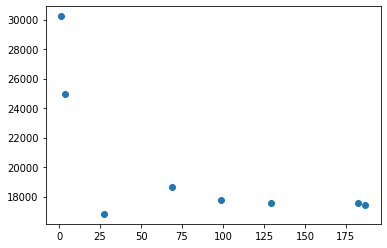

In [535]:
## Revivemos a biblioteca matplotlib.pyplot para fazer gráficos:
plt.scatter(test_cases_A, test_caged_A)

# Exercícios (vamos fazer juntos)

- Execute algumas outras correlações, para os seguintes casos:
  1. Estado de SP;
  2. Estado do RJ;
  3. Estado do AM.

# Correlações em relação ao preço da cesta básica.

Novamente, vamos aplicar as mesmas métricas, mas agora para o custo da cesta básica em Brasília:

In [536]:
## Um rápido lembrete dos dados
df_price.head()

,Sigla,Município,P2020.01,P2020.02,P2020.03,P2020.04,P2020.05,P2020.06,P2020.07,P2020.08,P2020.09,P2020.10
0,AC,Rio Branco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,Maceió,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AM,Manaus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AP,Macapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BA,Salvador,376.49,395.49,408.06,425.12,410.33,419.18,415.22,418.72,459.33,454.5


Vemos que alguns valores estão perdidos. Será que o DF está nos dados?

In [537]:
# Como é a verificação?
## (D)

Assim, preparamos os dados para fazer novamente a correlação.

In [558]:
# Obtém os dados de preços
## Primeiro separamos os preços corretos
test_price = df_price.loc[df_price['Sigla'] == "DF", "P2020.03":"P2020.10"]
## Convertemos em numérico
test_price = test_price.to_numpy()
## E depois, em lista simples
test_price = np.concatenate(np.asarray(test_price))
## Por fim, vemos a conversão
print(test_price)

[484.15 471.17 441.09 450.45 449.96 443.28 445.76 490.48]


Agora, podemos traçar as correlações entre preços e casos:

In [559]:
## Assim como anteriormente:
pcorr, psig = sps.pearsonr(test_cases_A, test_price)
pscorr, pssig = sps.spearmanr(test_cases_A, test_price)
print('A correlação de Pearson é de %.3f,' % pcorr, "com significância de %.3f." % psig)
print('A correlação de Spearman é de %.3f.' % pscorr, "com significância de %.3f." % pssig)

A correlação de Pearson é de -0.548, com significância de 0.159.
A correlação de Spearman é de -0.405. com significância de 0.320.


# Desafios

- O mesmo acontece para a Bahia?
- O mesmo acontece para o Rio de Janeiro?

---
---
---

# Testes de média e hipóteses

Primeiro, vamos fazer alguns testes simples (testes T) para descobrir se há diferenças entre as médias de casos de cada estado, ou para cada mês.

Depois, vamos comparar grupos de médias, e verificar se algo pode ter causado uma maior ou menor taxa de casos.

## Médias por estado

Vamos coletar as médias de cada estado para todos os períodos, e testar se são diferentes.

Vamos testar toda a região sudeste.


In [538]:
# Novamente, revisamos os dados normalizados
casos_10k_df.head()

,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12,2021.01,Sigla
0,0.0,1.086690,3.351719,27.573123,129.086994,186.812493,182.478825,98.859336,68.736418,52.046561,73.826187,31.929703,DF
1,0.0,0.091375,1.006531,4.106254,29.069915,61.235334,90.763530,108.110730,64.716020,33.690680,41.406951,19.893049,GO
2,0.0,0.170855,0.736814,4.392406,23.051235,60.408045,85.431235,73.926975,44.984790,59.503936,123.514181,44.073562,MS
3,0.0,0.070897,0.771364,6.046134,37.453704,102.741746,111.964086,90.947247,55.260307,43.193561,60.387611,38.644781,MT
4,0.0,0.053707,3.061277,27.581326,76.603523,70.901671,56.926019,24.093380,11.666268,12.516623,29.341709,14.626099,AL


In [539]:
# Extraimos algumas médias
casos_SP = casos_10k_df.loc[casos_10k_df['Sigla'] == "SP", '2020.03':'2020.10']
casos_MG = casos_10k_df.loc[casos_10k_df['Sigla'] == "MG", '2020.03':'2020.10']
casos_RJ = casos_10k_df.loc[casos_10k_df['Sigla'] == "RJ", '2020.03':'2020.10']
casos_ES = casos_10k_df.loc[casos_10k_df['Sigla'] == "ES", '2020.03':'2020.10']

In [540]:
# Finalmente, fazemos um teste T:
sps.ttest_ind(casos_SP, casos_MG)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Ttest_indResult(statistic=array([nan, nan, nan, nan, nan, nan, nan, nan]), pvalue=array([nan, nan, nan, nan, nan, nan, nan, nan]))

In [541]:
# É necessário, novamente, converter para numérico.
## Vamos fazer uma função que faça isso raidamente
def ToArray(DataframeRow):
  Array = np.concatenate(np.asarray(DataframeRow))
  return(Array)

In [542]:
# Então, aplicamos a função para transformar os dados:
casos_array_SP = ToArray(casos_SP)
casos_array_RJ = ToArray(casos_RJ)
print(len(casos_array_SP), casos_array_SP)

8 [ 0.50486794  5.69440048 17.49863192 37.08889044 56.36806216 56.60872236
 39.1636665  28.19202428]


In [543]:
# Finalmente, aplicamos o teste T
sps.ttest_ind(casos_array_SP, casos_array_RJ)

Ttest_indResult(statistic=0.8943298812644624, pvalue=0.3862624961920432)

É evidente que não houve significância. Vamos testar os outros estados
do sudeste.

In [544]:
ttest_SPxMG, pvalSPxMG = sps.ttest_ind(ToArray(casos_SP), ToArray(casos_MG))
ttest_SPxES, pvalSPxES = sps.ttest_ind(ToArray(casos_SP), ToArray(casos_ES))

print("Significância para SPxMG: ", pvalSPxMG)
print("Significância para SPxMG: ", pvalSPxES)

Significância para SPxMG:  0.3714067974023819
Significância para SPxMG:  0.22729488334588502


Certo. Agora vamos testar diversas regiões, com outra biblioteca: O Scipy, que permite colocar vários tratamentos de uma só vez em uma análise de variância:


In [545]:
## Lembre-se da biblioteca SciPy (importada como sps):
sps.f_oneway(
    ToArray(casos_SP), ToArray(casos_RJ), ToArray(casos_MG), ToArray(casos_ES)
)

F_onewayResult(statistic=2.370488473954361, pvalue=0.09179943042272258)

Neste exemplo, não há diferença entre nenhum dos grupos.
Vamos colocar, agora, a região centro-oeste.

Antes, vamos facilitar nossa vida com as transformações, criando uma função que extraia o valor exatamente da nossa tabela:

In [546]:
# Para extrair um estado, lembre do que fizemos:
## Primeiro, extrai da tabela:
### casos_SP = casos_10k_df.loc[casos_10k_df['Sigla'] == "SP", '2020.03':'2020.10']
## Depois, transforma em array:
### ToArray(casos_SP)

# [.. Função que faça os dois ao mesmo tempo .. ] #
def StateArray(state):
  cases = casos_10k_df.loc[casos_10k_df['Sigla'] == state, '2020.03':'2020.10']
  arrayCases = ToArray(cases).tolist()
  return(arrayCases)

## Então, teste a função:
StateArray("AM")

[0.41590279187226126,
 12.070687313824086,
 85.85184259196323,
 69.97861546673562,
 71.5756821875251,
 46.00122536845422,
 45.226457881880755,
 53.133364102217975]

In [547]:
## Lembre-se da biblioteca SciPy (importada como sps):
sps.f_oneway(
    StateArray("SP"), StateArray("RJ"), StateArray("MG"), StateArray("ES"),
    StateArray("MS"), StateArray("MT"), StateArray("GO"), StateArray("DF")
)

F_onewayResult(statistic=2.2488163200868136, pvalue=0.043411809309380274)

Aha! Agora já temos a significância! Porém, onde ela está?

Iremos descobrir isso com um teste "post-hoc", ou "pós-análise", com o pacote `statsmodel`.

Para tanto, vamos alimentar os mesmos dados:


In [548]:
## Separa os dados
dados_teste_tukey = np.array([StateArray("SP") + StateArray("RJ") + StateArray("MT") + StateArray("GO")])

## Descobre o tamanho
len(dados_teste_tukey[0])

## Cria os grupos
grupos_tukey = np.repeat(["SE", "CO"], 16)
print(stats.pairwise_tukeyhsd(dados_teste_tukey[0], groups=grupos_tukey, alpha=0.05))


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    CO     SE -21.5463 0.0744 -45.3501 2.2574  False
----------------------------------------------------


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


---
---
---

# Conclusões

- Sobre correlação: algumas correlações fracas foram detectadas entre a taxa de desempregados e casos de COVID no Distrito Federal
- No Sudeste, as médias foram as mesmas para casos de COVID a cada 10.000 pessoas.
- Comparando Sudeste e Centro-Oeste, há diferenças significativas nas médias mensais de casos.

---
---
---

# Desafios

Conseguiremos incluir todos os estados em testes post-hoc? Possivelmente, repetindo o processo para cada região.

In [ ]:
## Cria um dicionário vazio:
estados_regiao = {}

## Cria um dicionário de cada região
for regiao in df_brdat['Regiao']:
  # print(regiao)
  estados_regiao[regiao] = df_brdat['Sigla'][df_brdat['Regiao'] == regiao]

## Testa, verificando se saiu tudo certo:
print(estados_regiao)

# Desafios

Vamos testar alguns outros grupos da planilha "brasil.csv":
1. Se é litorâneo ou não;
2. Se há fronteiras ou não;
3. Categorias de IDH.

# Recomendações finais

Eu sou o tipo de pessoa que odeia ficar superficialmente em assuntos, especialmente assuntos importantes. Assim, selecionei a dedo algumas coisas que podem ajudar em algumas áreas.

## Se ensine ciências da computação

- [TYCS](https://teachyourselfcs.com/)

## Trechos de estatística

- [Machine Learning Mastery with Python](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)
- [Anova "Two-Way"](https://www.statology.org/two-way-anova-python/)

# Convite final: o projeto Rosalind

http://rosalind.info/about/

![Rosalind01](https://i.imgur.com/q54CCwa.png)
